# Cross-Country Comparison: Benin, Sierra Leone, Togo
Objective: synthesize cleaned CSVs and compare GHI, DNI, DHI across countries.
Branch: compare-countries
Notebook: compare_countries.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set(style="whitegrid", palette="Set2")

In [9]:
benin = pd.read_csv("../data/clean/benin-malanville-clean.csv")
sierra = pd.read_csv("../data/clean/sierra_leone-malanville-clean.csv")
togo = pd.read_csv("../data/clean/togo-dapaong_qc-clean.csv")
benin['country'] = 'Benin'
sierra['country'] = 'Sierra Leone'
togo['country'] = 'Togo'
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

In [10]:
metrics = df_all.groupby('country')[['GHI','DNI','DHI']].agg(['mean','median','std']).round(2)
display(metrics)

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         229.30   -0.4  324.31  162.12   -0.2  259.36  108.95   -0.5   
Sierra Leone  176.93   -0.5  272.84   97.93   -0.1  195.28  105.31   -0.7   
Togo          218.73   -0.2  313.97  144.59    0.0  245.33  110.78    0.8   

                      
                 std  
country               
Benin         151.92  
Sierra Leone  153.04  
Togo          150.66

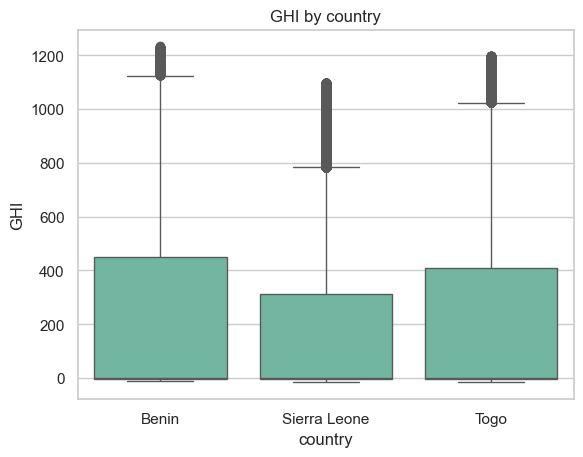

In [11]:
sns.boxplot(x='country', y='GHI', data=df_all)
plt.title('GHI by country')
plt.show()

In [12]:
from scipy.stats import f_oneway, kruskal

f_stat, pval = f_oneway(
    benin['GHI'].dropna(), sierra['GHI'].dropna(), togo['GHI'].dropna()
)
print("ANOVA F-stat:", f_stat, "p-value:", pval)

# if data non-normal or heteroskedastic:
h_stat, h_pval = kruskal(benin['GHI'].dropna(), sierra['GHI'].dropna(), togo['GHI'].dropna())
print("Kruskal-Wallis H:", h_stat, "p-value:", h_pval)

ANOVA F-stat: 4121.643728566369 p-value: 0.0
Kruskal-Wallis H: 6925.279772703941 p-value: 0.0


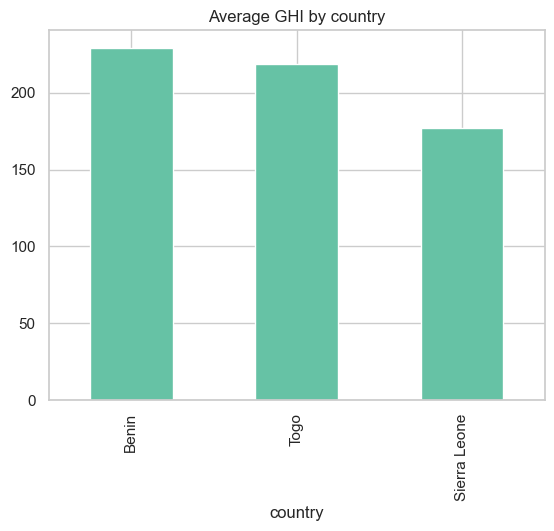

In [13]:
avg = df_all.groupby('country')['GHI'].mean().sort_values(ascending=False)
avg.plot.bar()
plt.title('Average GHI by country')
plt.show()